In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    #用来正常显示负号
plt.style.use('ggplot')

df = pd.read_excel('./data/155499404.xls')
TV = df[df.type == '电视剧']
movie = df[df.type == '电影']

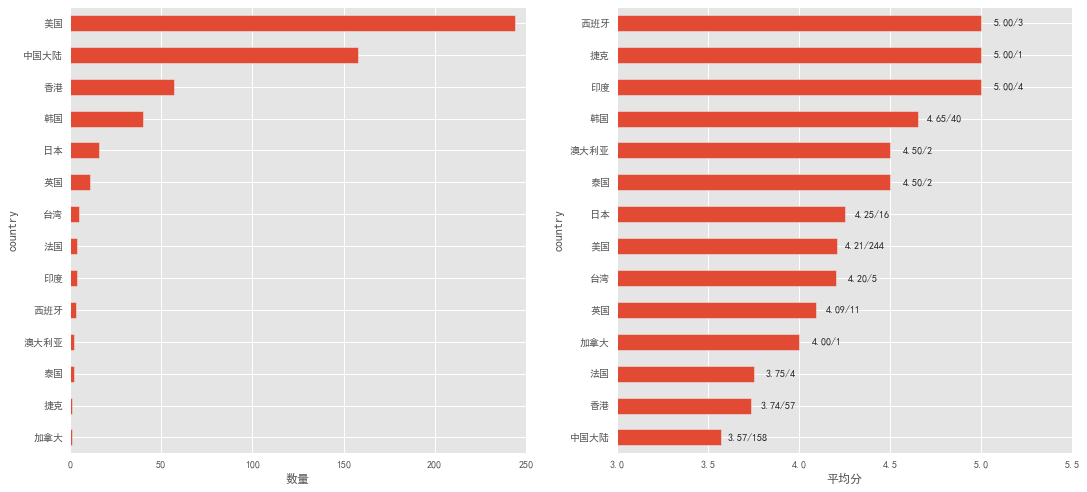

In [319]:
m_by_country = movie.groupby('country').myRate.agg([pd.Series.count, pd.Series.mean])
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))
m_by_country.sort_values(by='count')['count'].plot.barh(ax = axes[0])
axes[0].set(xlabel = '数量')
m_by_country.sort_values(by='mean')['mean'].plot.barh(ax = axes[1])
axes[1].set(xlim = [3, 5.5], xlabel = '平均分')
for i in range(len(m_by_country)):
    n = m_by_country.sort_values(by='mean').iloc[i, 0]
    score = m_by_country.sort_values(by='mean').iloc[i, 1]
    plt.text(score + 0.15 , i - 0.15, '%.2f/%d' % (score, n), ha = 'center', va = 'bottom')


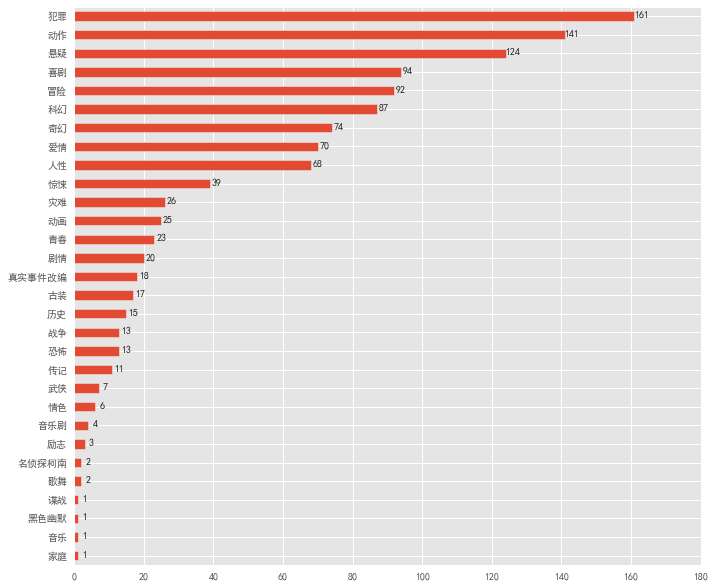

In [326]:
movie_tags = {}
for tags in movie['myTag']:
    tags = re.sub(r'[\[\]\' ]', '', tags).split(',')
    for tag in tags:
        movie_tags[tag] = movie_tags.setdefault(tag, 0) + 1

mv_df = pd.DataFrame({'num': list(movie_tags.values())}, index = list(movie_tags.keys()))
mv_df = mv_df.sort_values(by = 'num', ascending=True)
mv_df['num'].plot.barh(figsize = (10, 10))

for i in range(len(mv_df)):
    score = mv_df.iloc[i, 0]
    plt.text(score + 2 , i - 0.15, '%d' % (score), ha = 'center', va = 'bottom')